In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## 3.1 Автоматическое дифференцирование в `torch`

3.1.1 Воспользовавшись классами `Neuron` и `SquaredLoss` из задачи 2.4.1 и автоматическим дифференцированием, которое предоставляет `torch`, решить задачу регрессии. Для оптимизации использовать стохастический градиетный спуск.

In [ ]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32)

In [ ]:
class MSELoss:
  def forward(self, y_pred, y_true):
    return (y_pred - y_true)**2


class Neuron:
  def __init__(self, n_inputs):
    # <создать атрибуты объекта weights и bias>
    self.weights = torch.randn(size=(n_inputs, ), requires_grad=True)
    self.bias = torch.randn(size=(1, ), requires_grad=True)
  def forward(self, inputs):
    self.x = inputs
    return inputs @ self.weights + self.bias  # <реализовать логику нейрона>

In [ ]:
n_inputs = 4  # <размерность элемента выборки >
learning_rate = 0.1 #  скорость обучения
n_epoch = 100 #  количество эпох

neuron = Neuron(n_inputs)
loss = MSELoss()
losses = []

for epoch in range(100):
  for x_example, y_example in zip(X, y):
    # forward pass
    y_pred = neuron.forward(x_example)  # <прогон через нейрон>
    curr_loss = loss.forward(y_pred, y_example)  # <прогон через функцию потерь>

    losses.append(curr_loss.item())

    # backprop
    # <вызов методов backward>
    curr_loss.backward()

    # <шаг оптимизации для весов (weights и bias) нейрона>
    with torch.no_grad():
        neuron.weights -= learning_rate * neuron.weights.grad
        neuron.bias -= learning_rate * neuron.bias.grad
    
    neuron.weights.grad.zero_()
    neuron.bias.grad.zero_()

5.6843418860808015e-12

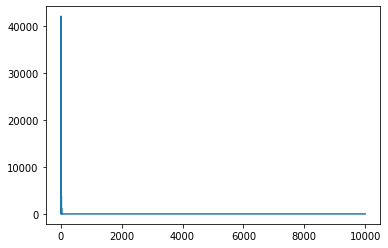

In [ ]:
plt.plot(losses)
losses[-1]

3.1.2 Воспользовавшись классами `Linear` и `MSELoss` из задачи 2.1.4 и 2.3.1, `ReLU` из 2.2.1 и автоматическим дифференцированием, которое предоставляет `torch`, решить задачу регрессии. Для оптимизации использовать пакетный градиентный спуск. Вывести график функции потерь в зависимости от номера эпохи. Вывести на одном графике исходные данные и предсказанные значения.

In [ ]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size())

In [ ]:
class Linear:
  def __init__(self, n_features, n_neurons):
    self.weights = torch.randn(size=(n_features, n_neurons), requires_grad=True)
    self.biases = torch.randn(size=(n_neurons, ), requires_grad=True)
  
  def forward(self, inputs):
    return inputs @ self.weights + self.biases


class MSELoss:
  def forward(self, y_pred, y_true):
    return ((y_pred - y_true.view(-1, 1))**2).mean()


class ReLU:
  def forward(self, inputs):
    return torch.clamp(inputs, min=0)

In [ ]:
linear1 = Linear(1, 1000)
linear2 = Linear(1000, 1)

learning_rate = 0.001
loss = MSELoss()
activation = ReLU()

losses = []
num_epochs = 1000

optimizer = torch.optim.SGD([linear1.weights, linear1.biases, linear2.weights, linear2.biases], lr=learning_rate)

for epoch in range(num_epochs):

    y_pred = linear1.forward(X)
    y_pred = activation.forward(y_pred)
    y_pred = linear2.forward(y_pred)

    curr_loss = loss.forward(y_pred, y)

    losses.append(curr_loss.item())

    curr_loss.backward()

    optimizer.step()

    linear1.weights.grad.zero_()
    linear1.biases.grad.zero_()

    linear2.weights.grad.zero_()
    linear2.biases.grad.zero_()

0.008880211971700191

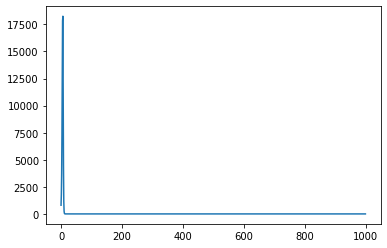

In [ ]:
plt.plot(losses);
losses[-1]

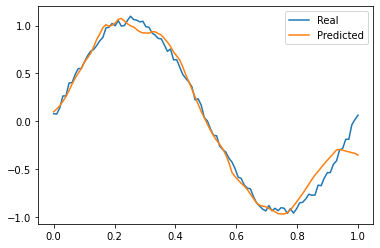

In [ ]:
with torch.no_grad():
    y_pred = linear1.forward(X)
    y_pred = activation.forward(y_pred)
    y_pred = linear2.forward(y_pred)

plt.plot(X.flatten(), y, label='Real')
plt.plot(X.flatten(), y_pred, label='Predicted')
plt.legend()
plt.show()

## 3.2 Алгоритмы оптимизации в `torch.optim`

In [ ]:
import torch.optim as optim

3.2.1 Решить задачу 3.1.1, воспользовавшись оптимизатором `optim.SDG` для применения стохастического градиентого спуска

In [ ]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32)

In [ ]:
class MSELoss:
  def forward(self, y_pred, y_true):
    return (y_pred - y_true)**2

class Neuron:
  def __init__(self, n_inputs):
    # <создать атрибуты объекта weights и bias>
    self.weights = torch.randn(size=(n_inputs, ), requires_grad=True)
    self.bias = torch.randn(size=(1, ), requires_grad=True)
  def forward(self, inputs):
    self.x = inputs
    return inputs @ self.weights + self.bias  # <реализовать логику нейрона>

n_inputs = 4  # <размерность элемента выборки >
learning_rate = 0.1 #  скорость обучения
n_epoch = 100 #  количество эпох

neuron = Neuron(n_inputs)
loss = MSELoss()
losses = []

optimizer = optim.SGD([neuron.weights, neuron.bias], lr=learning_rate)

for epoch in range(100):
  for x_example, y_example in zip(X, y):
    # forward pass
    y_pred = neuron.forward(x_example)  # <прогон через нейрон>
    curr_loss = loss.forward(y_pred, y_example)  # <прогон через функцию потерь>

    losses.append(curr_loss.item())

    # backprop
    # <вызов методов backward>
    curr_loss.backward()

    # <шаг оптимизации для весов (weights и bias) нейрона>
    optimizer.step()
    optimizer.zero_grad()

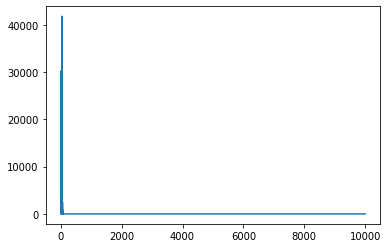

In [ ]:
plt.plot(losses)

3.2.2 Решить задачу 3.1.2, воспользовавшись оптимизатором `optim.Adam` для применения пакетного градиентого спуска. Вывести график функции потерь в зависимости от номера эпохи. Вывести на одном графике исходные данные и предсказанные значения.

In [ ]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size())

In [ ]:
class Linear:
  def __init__(self, n_features, n_neurons):
    self.weights = torch.randn(size=(n_features, n_neurons), requires_grad=True)
    self.biases = torch.randn(size=(n_neurons, ), requires_grad=True)
  
  def forward(self, inputs):
    return inputs @ self.weights + self.biases


class MSELoss:
  def forward(self, y_pred, y_true):
    return ((y_pred - y_true.view(-1, 1))**2).mean()


class ReLU:
  def forward(self, inputs):
    return torch.clamp(inputs, min=0)

In [ ]:
linear1 = Linear(1, 1000)
linear2 = Linear(1000, 1)

learning_rate = 0.001
loss = MSELoss()
activation = ReLU()
optimizer = torch.optim.Adam([linear1.weights, linear1.biases, linear2.weights, linear2.biases], lr=learning_rate)

losses = []
num_epochs = 10000

for epoch in range(num_epochs):

    y_pred = linear1.forward(X)
    y_pred = activation.forward(y_pred)
    y_pred = linear2.forward(y_pred)

    curr_loss = loss.forward(y_pred, y)

    losses.append(curr_loss.item())

    curr_loss.backward()

    optimizer.step()
    optimizer.zero_grad()

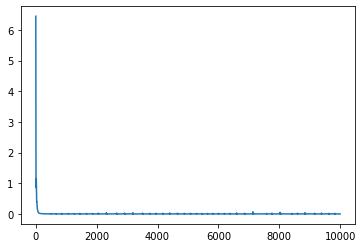

In [ ]:
plt.plot(losses);

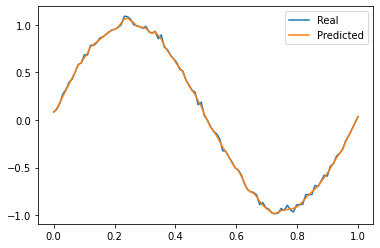

In [ ]:
with torch.no_grad():
    y_pred = linear1.forward(X)
    y_pred = activation.forward(y_pred)
    y_pred = linear2.forward(y_pred)

plt.plot(X.flatten(), y, label='Real')
plt.plot(X.flatten(), y_pred, label='Predicted')
plt.legend()
plt.show()

## 3.3 Построение сетей при помощи `torch.nn`

In [ ]:
import torch.nn as nn

3.3.1 Решить задачу регрессии, соблюдая следующие условия:

1. Оформить нейронную сеть в виде класса - наследника `nn.Module`
2. При создании сети использовать готовые блоки из `torch.nn`: слои, функции активации, функции потерь и т.д.
3. Для оптимизации использовать любой алгоритм оптимизации из `torch.optim` 

In [ ]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size()) 

In [ ]:
class NET(nn.Module):
    def __init__(self, n_neurons):
        super(NET, self).__init__()
        self.fc1 = nn.Linear(1, n_neurons)
        self.act1 = nn.ReLU()
        self.fc2 = nn.Linear(n_neurons, n_neurons)
        self.act2 = nn.ReLU()
        self.fc3 = nn.Linear(n_neurons, 1)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x

In [ ]:
net = NET(100)
optimizer = torch.optim.Adam(net.parameters(), lr=1.0e-3)
loss = nn.MSELoss()
losses = []
num_epochs = 500

for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = net(X)
    curr_loss = loss(y_pred, y)
    losses.append(curr_loss.item())
    curr_loss.backward()
    optimizer.step()

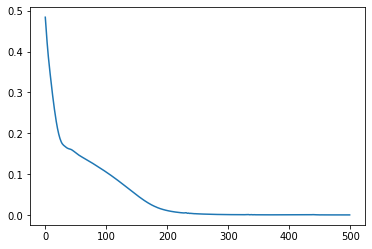

In [ ]:
plt.plot(losses)

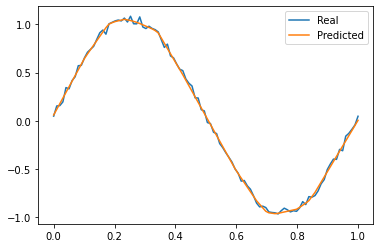

In [ ]:
plt.plot(X.flatten(), y, label='Real')
plt.plot(X.flatten(), y_pred.detach(), label='Predicted')
plt.legend()
plt.show()

3.3.2 Решить задачу регрессии, соблюдая следующие условия:

1. Оформить нейронную сеть в виде объекта `nn.Sequential`
2. При создании сети использовать готовые блоки из `torch.nn`: слои, функции активации, функции потерь и т.д.
3. Для оптимизации использовать любой алгоритм оптимизации из `torch.optim` 

In [ ]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size()) 

In [ ]:
n_neurons = 100
net = torch.nn.Sequential(torch.nn.Linear(1, n_neurons),
                          torch.nn.ReLU(),
                          torch.nn.Linear(n_neurons, n_neurons),
                          torch.nn.ReLU(),
                          torch.nn.Linear(n_neurons, 1))

In [ ]:
optimizer = torch.optim.Adam(net.parameters(), lr=1.0e-3)
loss = nn.MSELoss()
losses = []
num_epochs = 500

for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = net(X)
    curr_loss = loss(y_pred, y)
    losses.append(curr_loss.item())
    curr_loss.backward()
    optimizer.step()

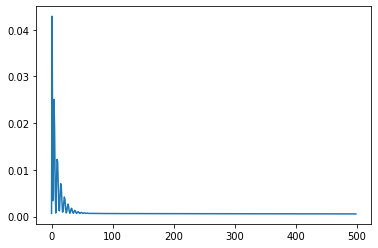

In [ ]:
plt.plot(losses)

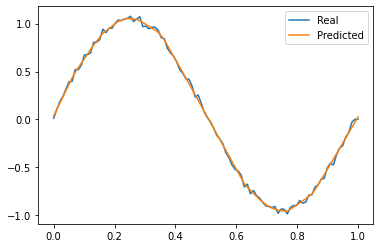

In [ ]:
plt.plot(X.flatten(), y, label='Real')
plt.plot(X.flatten(), y_pred.detach(), label='Predicted')
plt.legend()
plt.show()

## 3.4. Datasets and dataloaders

In [ ]:
from torch.utils.data import Dataset, DataLoader

3.4.1 Создать датасет, поставляющий данные из задачи 3.1.2. 

Создать `DataLoader` на основе этого датасета и проверить работоспособность.

Воспользовавшись результатами 3.3.1 (или 3.3.2) обучите модель, пользуясь мини-пакетным градиентным спуском с размером пакета (`batch_size`) = 10

In [ ]:
class SinDataset(Dataset):
  def __init__(self):
    super(SinDataset, self).__init__()
    self.X = torch.linspace(0, 1, 100).view(-1, 1)
    self.y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size())

  def __len__(self):
    return self.X.shape[0]

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]

In [ ]:
dataset = SinDataset()
batch_size = 10
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [ ]:
net = NET(100)
optimizer = torch.optim.Adam(net.parameters(), lr=1.0e-3)
loss = nn.MSELoss()
losses = []
num_epochs = 500

for epoch in range(num_epochs):
    curr_batch_loss = 0
    for X_batch, y_batch in dataloader:
        optimizer.zero_grad()
        y_pred = net(X_batch)
        curr_loss = loss(y_pred, y_batch)
        curr_batch_loss += curr_loss.item()
        curr_loss.backward()
        optimizer.step()
    losses.append(curr_batch_loss / len(dataloader))

0.0010288300458341838

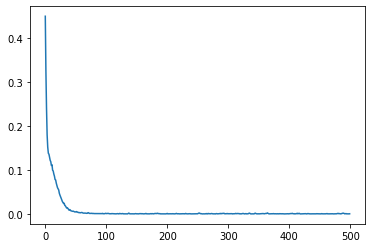

In [ ]:
plt.plot(losses)
losses[-1]

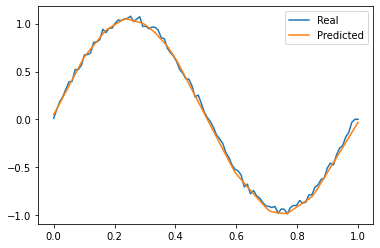

In [ ]:
y_pred = net(X)

plt.plot(X.flatten(), y, label='Real')
plt.plot(X.flatten(), y_pred.detach(), label='Predicted')
plt.legend()
plt.show()

3.4.2 Предсказание цен алмазов

3.4.2.1 Создайте датасет на основе файла diamonds.csv. 

1. Удалите все нечисловые столбцы
2. Целевой столбец (`y`) - `price`
3. Преобразуйте данные в тензоры корректных размеров

3.4.2.2 Разбейте датасет на обучающий и тестовый датасет при помощи `torch.utils.data.random_split`.

3.4.2.3 Обучите модель для предсказания цен при помощи мини-пакетного градиентного спуска (`batch_size = 256`). 

3.4.2.4 Выведите график функции потерь в зависимости от номера эпохи (значение потерь для эпохи рассчитывайте как среднее значение ошибок на каждом батче). Проверьте качество модели на тестовой выборке. 


3.4.3 Модифицируйте метод `__init__` датасета из 3.4.2 таким образом, чтобы он мог принимать параметр `transform: callable`. Реализуйте класс `DropColsTransform` для удаления нечисловых данных из массива. Реализуйте класс `ToTensorTransorm` для трансформации массива в тензор.